In [1]:
#importing the necessary libraries and Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
              ])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
#importing the dataset

reviews = pd.read_csv('tourist_review.csv')

In [3]:
#Exploration of the dataset

reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579769293,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,I finally made to to The Cove after hearing fr...
1,rn578446147,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,The food and the service were both excellent a...
2,rn578261388,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Almost confused with the corner bar but what a...
3,rn578201696,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,I know your probably going to reply with all t...
4,rn577322860,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Super service and great food! Nice views and c...


In [4]:
reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
2988,rn145486095,"Reviewed November 15, 2012",Choeng Thale,9' Sea Breeze,this great little place on surin beach serves ...
2989,rn145450467,"Reviewed November 15, 2012",Choeng Thale,9' Sea Breeze,"If you're looking for a good food, great atmos..."
2990,rn145136705,"Reviewed November 11, 2012",Choeng Thale,9' Sea Breeze,Meeting different people from all over the wor...
2991,rn145067924,"Reviewed November 10, 2012",Choeng Thale,9' Sea Breeze,This has to be the best sports bar restaurant ...
2992,rn144513470,"Reviewed November 4, 2012",Choeng Thale,9' Sea Breeze,This is a great little restaurant with loads o...


In [5]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2993,2993,2993,2993,2993
unique,2963,1129,2,30,2963
top,rn579563747,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,We had dinner here. Just stumbled across it. S...
freq,3,32,1500,100,3


In [6]:
#identying and defining stop word in english langauge

stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#preprocessing the texts by splitting them into seperate parts named tokens and cleaning out these tokens by removing the stop words(tokenisation)

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [9]:
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn579769293,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,I finally made to to The Cove after hearing fr...,0.9388,0.000,0.685,0.315
1,rn578446147,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,The food and the service were both excellent a...,0.9215,0.061,0.643,0.296
2,rn578261388,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Almost confused with the corner bar but what a...,0.8944,0.030,0.768,0.202
3,rn578201696,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,I know your probably going to reply with all t...,0.8563,0.058,0.727,0.215
4,rn577322860,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Super service and great food! Nice views and c...,0.9549,0.000,0.479,0.521


In [10]:
reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
2988,rn145486095,"Reviewed November 15, 2012",Choeng Thale,9' Sea Breeze,this great little place on surin beach serves ...,0.8292,0.000,0.792,0.208
2989,rn145450467,"Reviewed November 15, 2012",Choeng Thale,9' Sea Breeze,"If you're looking for a good food, great atmos...",0.9459,0.000,0.640,0.360
2990,rn145136705,"Reviewed November 11, 2012",Choeng Thale,9' Sea Breeze,Meeting different people from all over the wor...,0.7269,0.053,0.667,0.280
2991,rn145067924,"Reviewed November 10, 2012",Choeng Thale,9' Sea Breeze,This has to be the best sports bar restaurant ...,0.9796,0.000,0.572,0.428
2992,rn144513470,"Reviewed November 4, 2012",Choeng Thale,9' Sea Breeze,This is a great little restaurant with loads o...,0.9578,0.000,0.662,0.338


In [11]:
#Exploring the new columns for more insights into sentiment scores for review data

reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2993.000000,2993.000000,2993.000000,2993.000000
mean,0.708503,0.022771,0.730721,0.246509
std,0.378836,0.045676,0.126106,0.133492
min,-0.959400,0.000000,0.286000,0.000000
25%,0.662400,0.000000,0.648000,0.147000
50%,0.865800,0.000000,0.737000,0.241000
75%,0.933600,0.037000,0.819000,0.336000
max,0.990900,0.407000,1.000000,0.714000


In [12]:
#creating a funtion to compute negative, neutral and positive sentiments and add a new colum named sentiment to our dataset

def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

reviews['sentiment'] = reviews['compound'].apply(getAnalysis)

In [13]:
#viewing the new dataset
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,sentiment
0,rn579769293,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,I finally made to to The Cove after hearing fr...,0.9388,0.000,0.685,0.315,Positive
1,rn578446147,Reviewed 1 week ago,Cape Panwa,The Cove Phuket,The food and the service were both excellent a...,0.9215,0.061,0.643,0.296,Positive
2,rn578261388,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Almost confused with the corner bar but what a...,0.8944,0.030,0.768,0.202,Positive
3,rn578201696,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,I know your probably going to reply with all t...,0.8563,0.058,0.727,0.215,Positive
4,rn577322860,Reviewed 2 weeks ago,Cape Panwa,The Cove Phuket,Super service and great food! Nice views and c...,0.9549,0.000,0.479,0.521,Positive


In [14]:
#Counts for each sentiment type 

reviews['sentiment'].value_counts()

Positive    2749
Negative     191
Neutral       53
Name: sentiment, dtype: int64

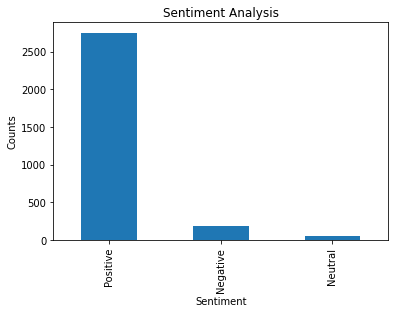

In [15]:
#visualise the counts for each sentiment type

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

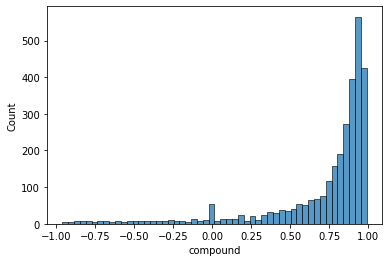

In [16]:
#visualise distribution of compound scores

sns.histplot(reviews['compound'])

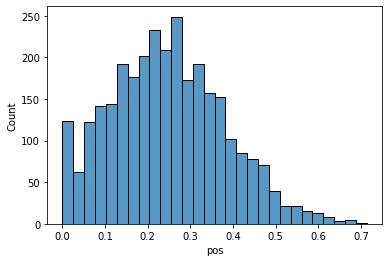

In [17]:
#visualise distribution of positive scores

sns.histplot(reviews['pos'])

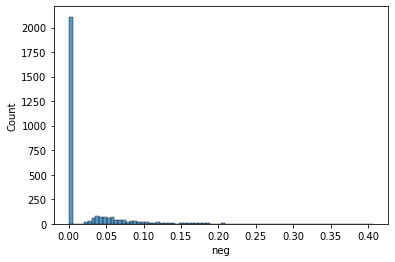

In [18]:
#visualise distribution of negative scores

sns.histplot(reviews['neg'])

In [19]:
#negative reviews per hotel/Restaurant

(reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
360 ° Bar                          5
9' Sea Breeze                     11
Ann's Kitchen Bar and Grill        5
Audy Restaurant                    5
Baan Ra Tree Restaurant           12
Baba Soul Food                     4
Bamboo Bar                         9
Bampot Kitchen & Bar               3
Benny's American Bar & Grill       5
Black Cat                         10
Bocconcino                         7
Bodega & Grill                     9
Cafe de Bangtao                   10
Chilli Kitchen                     7
Curry Night Indian Restaurant      3
Cut Grill & Lounge                11
D Restaurant                      11
DaVinci Restaurant                 5
DeDos                              4
Dino Park                         16
Live India Indian Restaurant      10
Mali Chic Restaurant              12
Panwa House                        8
Plum Prime Steakhouse              7
Sabai Sabai                       12
Sea Breeze                         9
The Cove Phuket 

In [20]:
#calculate the negative as a percentage of the total reviews

percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()
                                /reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
The Cove Phuket,2.000000
Curry Night Indian Restaurant,3.000000
Bampot Kitchen & Bar,3.000000
DeDos,4.000000
Baba Soul Food,4.000000
The Grill,5.000000
DaVinci Restaurant,5.000000
Benny's American Bar & Grill,5.000000
360 ° Bar,5.000000


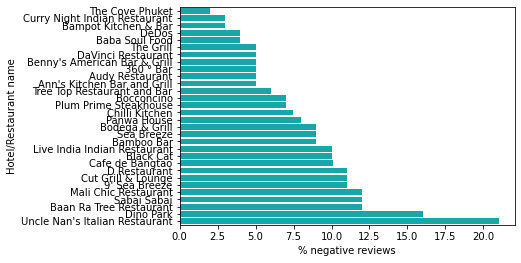

In [21]:
#plotting the percentages as an horizontal barplot

sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [22]:
#process the text data ready for wordcloud visualisation using the function defined earlier
#We'll focus on Uncle Nan's Italian restaurant as this got most negative reviews among the restaurants in cape panwa location


reviews['processed_review'] = reviews['Review'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Uncle Nan\'s Italian Restaurant')
                                 & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Uncle Nan\'s Italian Restaurant')
                                 & (reviews['compound']<=0),:]

reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,sentiment,processed_review
1300,rn576095102,Reviewed 3 weeks ago,Cape Panwa,Uncle Nan's Italian Restaurant,Needed some non Thai food one evening and went...,0.7878,0.000,0.655,0.345,Positive,"[need, non, thai, food, one, even, went, certa..."
1301,rn575028373,Reviewed 4 weeks ago,Cape Panwa,Uncle Nan's Italian Restaurant,This restaurant is at the Kantary Bay Hotel. I...,0.8495,0.030,0.796,0.174,Positive,"[restaur, kantari, bay, hotel, alway, littl, s..."
1302,rn572806144,"Reviewed April 12, 2018",Cape Panwa,Uncle Nan's Italian Restaurant,I think my daughter made a better pizza when s...,0.0258,0.129,0.737,0.134,Positive,"[think, daughter, made, better, pizza, 6yr, ol..."
1306,rn564703288,"Reviewed March 5, 2018",Cape Panwa,Uncle Nan's Italian Restaurant,Food and setting was lovely the only downside ...,0.5106,0.033,0.861,0.106,Positive,"[food, set, love, downsid, portion, could, big..."
1307,rn563337120,"Reviewed February 28, 2018",Cape Panwa,Uncle Nan's Italian Restaurant,We booked through cape panwa hotel .we had an ...,0.9501,0.000,0.656,0.344,Positive,"[book, cape, panwa, hotel, excel, meal, staff,..."


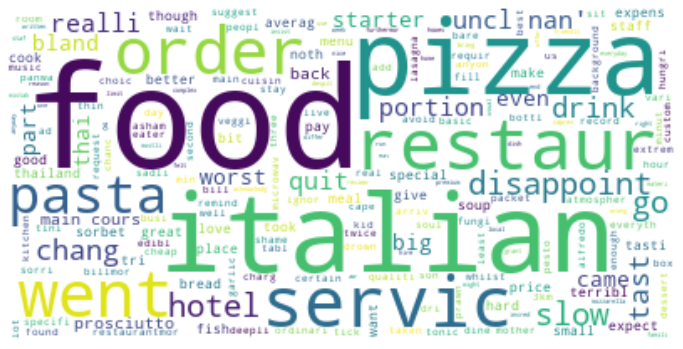

In [23]:
# Wordcloud of words from negative reviews for Uncle Nan's Italian Restaurant

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

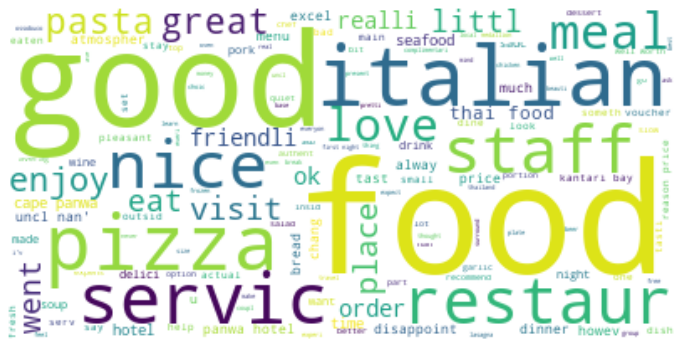

In [24]:
#wordcloud of words from positive reviews for Uncle Nan's Italian Restaurant

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#using FreqDist from NLTK to show the frequeny of words in a tabular form for positive reviews

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   food    good italian   pizza  servic    nice   staff restaur    meal   hotel 
     59      34      31      26      21      19      18      17      17      16 


In [26]:
#using FreqDist from NLTK to show the frequeny of words in a tabular form for negative reviews

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

      food    italian      pizza    restaur     servic      order       went      pasta disappoint       slow 
        18         10          9          7          7          6          6          6          5          5 


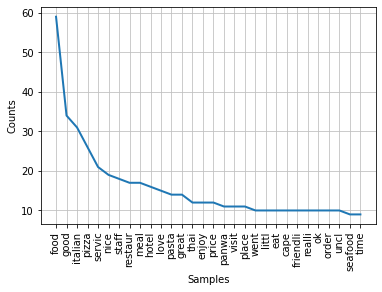

In [27]:
#Frequency distribution graph to show word frequency for postive reviews

pos_freqdist.plot(30)

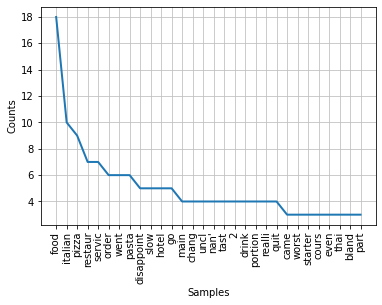

In [28]:
#Frequency distribution graph to show word frequency for negative reviews

neg_freqdist.plot(30)

In [29]:
#we will now focus on 9' Sea breeze as this got most reviews among the restaurants in the Choeng Thale location

reviews['processed_review'] = reviews['Review'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='9\' Sea Breeze')
                                 & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='9\' Sea Breeze')
                                 & (reviews['compound']<=0),:]

reviews_positive_subset.head()


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,sentiment,processed_review
2894,rn448554603,"Reviewed January 2, 2017",Choeng Thale,9' Sea Breeze,When we arrived the waitress told us they were...,0.1531,0.000,0.964,0.036,Positive,"[arriv, waitress, told, us, fish, ok, whole, f..."
2896,rn429518056,"Reviewed October 18, 2016",Choeng Thale,9' Sea Breeze,"The area is very nice, you got great views of ...",0.6835,0.059,0.776,0.165,Positive,"[area, nice, got, great, view, marina, restaur..."
2898,rn397018324,"Reviewed July 25, 2016",Choeng Thale,9' Sea Breeze,While staying at the Village Coconut Island re...,0.9453,0.000,0.724,0.276,Positive,"[stay, villag, coconut, island, resort, ventur..."
2899,rn391870926,"Reviewed July 12, 2016",Choeng Thale,9' Sea Breeze,"This was our first lunch at Phuket, the restau...",0.9545,0.000,0.586,0.414,Positive,"[first, lunch, phuket, restaur, clean, neat, f..."
2900,rn378584405,"Reviewed June 1, 2016",Choeng Thale,9' Sea Breeze,.........'cause it's a 5m walk from my apartme...,0.7263,0.000,0.873,0.127,Positive,"['caus, 5m, walk, apart, wonder, set, marina, ..."


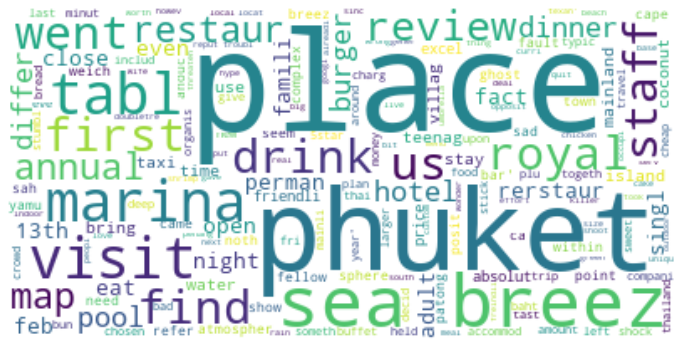

In [30]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

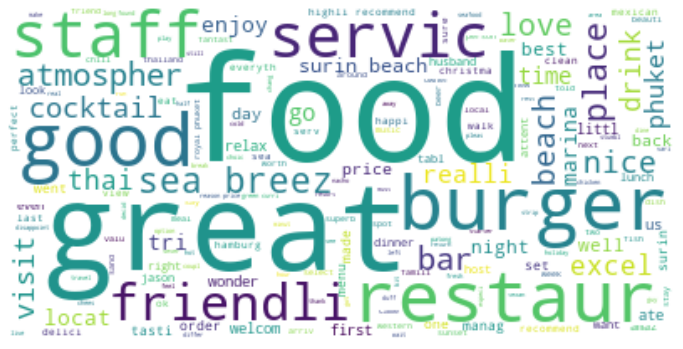

In [31]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   food   great  burger    good restaur   beach     sea   staff   breez  servic 
     64      43      32      30      28      27      25      22      21      21 


In [33]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

 place  breez phuket    sea  visit marina   tabl   went  royal   find 
     8      6      5      5      3      3      3      2      2      2 


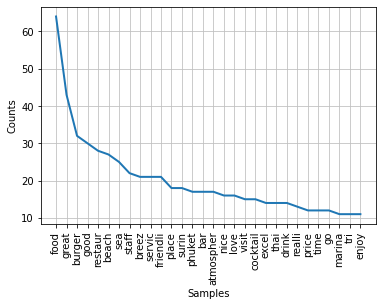

In [34]:
pos_freqdist.plot(30)

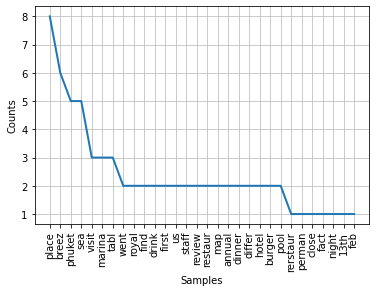

In [35]:
neg_freqdist.plot(30)